In [ ]:
import numpy as np
import pandas as pd


In [104]:
df=pd.read_csv('athlete_events.csv')
region_df=pd.read_csv('noc_regions.csv')

In [105]:
df.head()
# region_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [106]:
df=df[df['Season']=='Summer']

In [107]:
df.shape

(222552, 15)

In [108]:
df=df.merge(region_df,on='NOC',how='left')

In [109]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [110]:
df.duplicated().sum()

np.int64(1385)

In [111]:
df.drop_duplicates(inplace=True)

In [112]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [113]:
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [114]:
# a miscalculation
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,WIF,0,0,5
226,YEM,0,0,0
227,YAR,0,0,0
228,YMD,0,0,0


In [115]:
# the discrepancy
df[(df['NOC']=='IND') & (df['Medal']=='Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False


In [116]:
medal_tally=df.drop_duplicates(subset=['Team','Games','Year','City','Sport','Event','Medal'])

In [117]:
medal_tally.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False


In [118]:
# Actual medal tally
medal_tally = medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [119]:
medal_tally[medal_tally['NOC']=='IND']

,NOC,Gold,Silver,Bronze
50,IND,9,7,12


In [120]:
years=df['Year'].unique().tolist()

In [121]:
years.sort()

In [122]:
years.insert(0,'Overall')

In [123]:
country=df['region'].dropna().unique().tolist()

In [124]:
country.sort()

In [125]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [126]:
country.insert(0,'Overall')

In [127]:
medal_df=df.drop_duplicates(subset=['Team','Games','Year','City','Sport','Event','Medal'])

In [128]:
def fetch_medal_tally(df,year,country):
    medal_df=df.drop_duplicates(subset=['Team','Games','Year','City','Sport','Event','Medal'])
    flag=0
    if year=='Overall' and country=='Overall':
        temp_df=medal_df
    if year=='Overall' and country!='Overall':
        flag=1
        temp_df=medal_df[medal_df['region']==country]
    if year!='Overall' and country=='Overall':
        temp_df=medal_df[medal_df['Year']==int(year)]
    if year!='Overall' and country!='Overall':
        temp_df=medal_df[(medal_df['Year']==int(year)) and (medal_df['region']==country)]
   
    # Actual medal tally
    if flag==1:
        temp_df = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year',ascending=True).reset_index()
    else:
        temp_df = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    temp_df['total']=temp_df['Gold']+temp_df['Silver']+temp_df['Bronze']

    return temp_df





## Overall Analysis
*   No of Editions
*   No of Cities
*   No of events/sports
*   No of athletes
*   participating nations

In [129]:
#  1
df['Year'].unique().shape[0]-1 #  1906 olympic not considered

28

In [130]:
nations_over_time=df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

In [131]:
nations_over_time.rename(columns={'Year':'Edition','count':'No of Countries'},inplace=True)

In [132]:
import plotly.express as px

In [133]:
fig = px.line(nations_over_time, x='Edition',y='No of Countries')
fig.show()

In [134]:
x=df.drop_duplicates(['Year','Sport','Event'])

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int')

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
Sport,,,,,,,,,,,,,,,,,,,,,
Aeronautics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alpinism,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Archery,0,8,6,0,3,0,10,0,0,0,...,2,2,4,4,4,4,4,4,4,4
Art Competitions,0,0,0,0,0,5,5,5,13,13,...,0,0,0,0,0,0,0,0,0,0
Athletics,12,23,24,21,26,30,29,27,27,29,...,38,41,42,43,44,46,46,47,47,47
Badminton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,5,5,5,5,5,5
Baseball,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0
Basketball,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Basque Pelota,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Year', ylabel='Sport'>

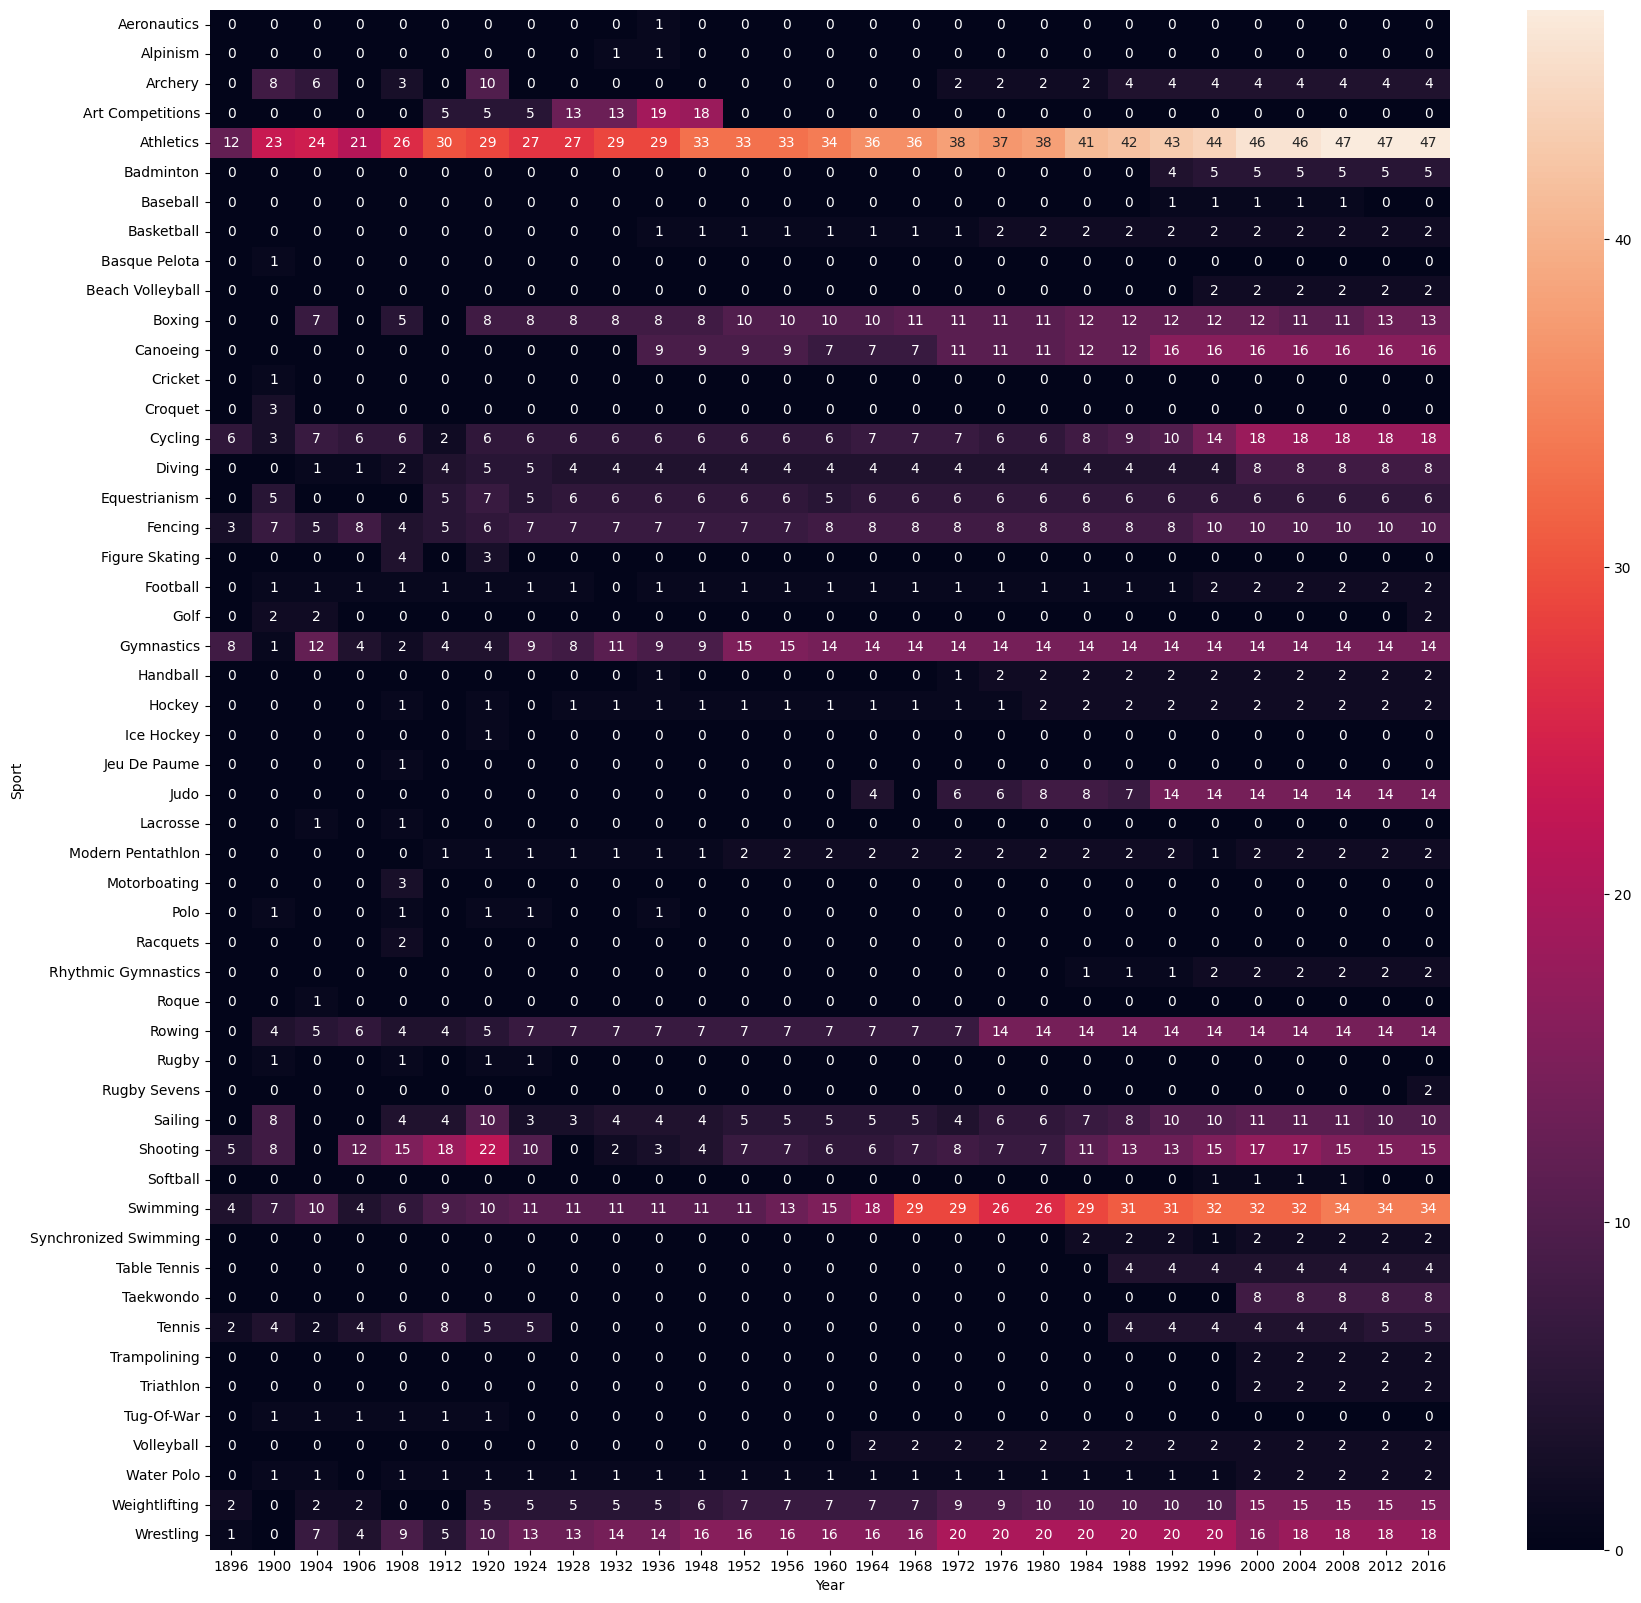

In [137]:
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [138]:
def most_successful(df,sport):
    temp_df=df.dropna(subset=['Medal'])
    
    if sport!='Overall':
        temp_df=temp_df[temp_df['Sport']==sport]
    
    x= temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='Name',right_on='Name',how='left')[['Name','count','Sport','region']].drop_duplicates('Name')                                             
    x.rename(columns={'count':'Medals'},inplace=True)
    return x

In [139]:
most_successful(df,'Overall')

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
130,Edoardo Mangiarotti,13,Fencing,Italy
144,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
157,Birgit Fischer-Schmidt,12,Canoeing,Germany
170,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
187,Ryan Steven Lochte,12,Swimming,USA


## Country Wise
* Countrywise medal tally per year(line plot)
* What countries are good at heatmap
* Most successful Atheletes(Top 10)

In [140]:
temp_df=df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

In [141]:
new_df=temp_df[temp_df['region']=='India']
final_df=new_df.groupby('Year').count()['Medal'].reset_index()

In [142]:
fig = px.line(final_df, x='Year',y='Medal')
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

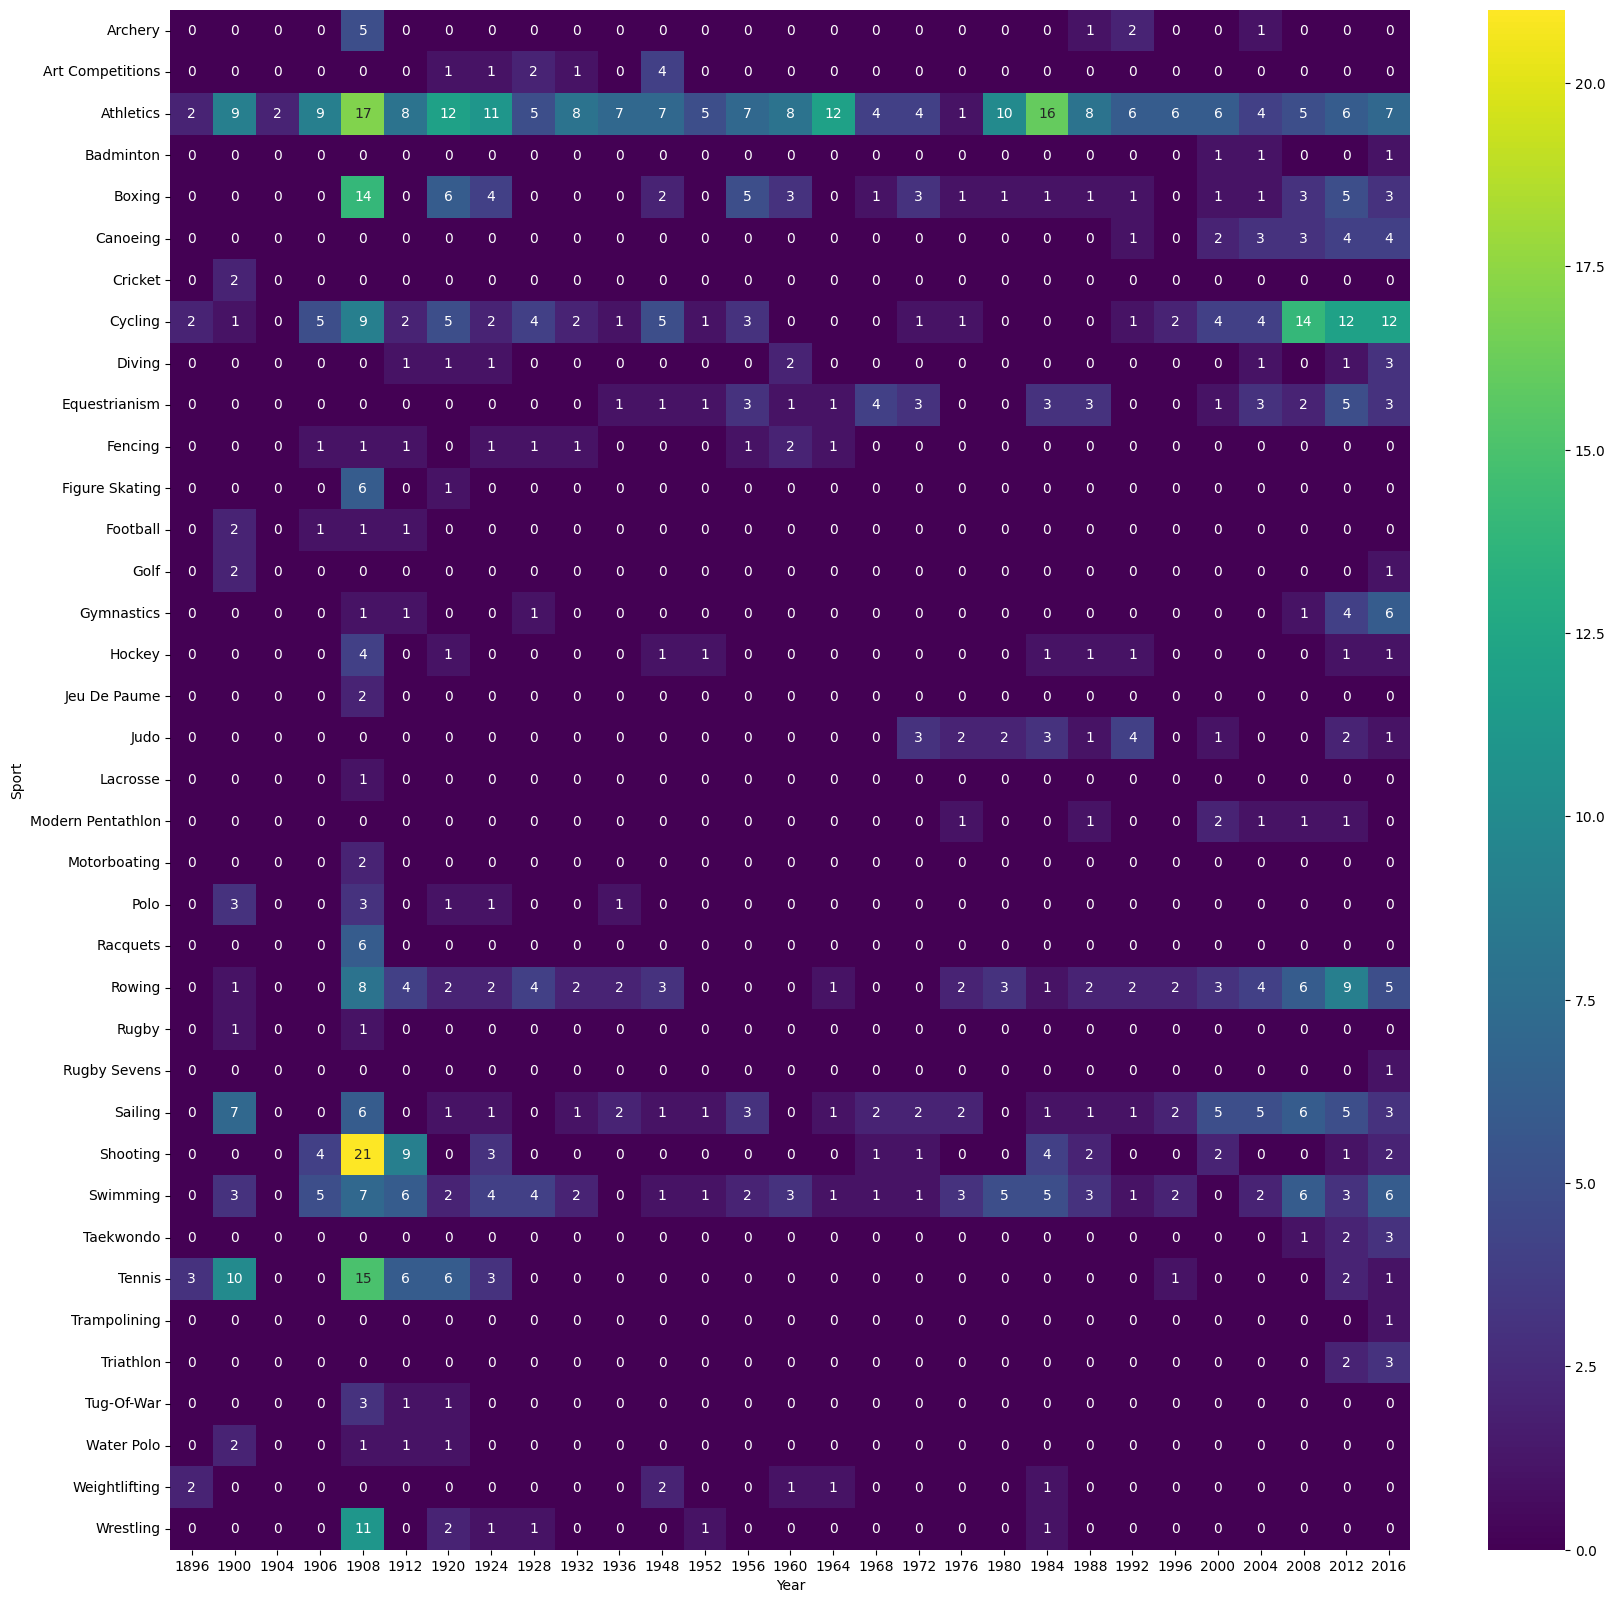

In [143]:
new_df=temp_df[temp_df['region']=='UK']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),cmap='viridis',annot=True)

In [144]:
def most_successful(df,country):
    temp_df=df.dropna(subset=['Medal'])
    
    temp_df=temp_df[temp_df['region']==country]
    
    x= temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='Name',right_on='Name',how='left')[['Name','count','Sport']].drop_duplicates('Name')                                             
    x.rename(columns={'count':'Medals'},inplace=True)
    return x

In [145]:
import plotly.figure_factory as ff


In [146]:
athlete_df=df
x1=athlete_df['Age'].dropna()
x2=athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3=athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4=athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()

In [147]:
fig=ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medallist','Silver Medallist','Bronze Medallist'],show_hist=False,show_rug=False)
fig.show()

In [148]:
athlete_df['Medal'].fillna('No Medal',inplace=True)

C:\Users\prava\AppData\Local\Temp\ipykernel_18700\4160890072.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





<Axes: xlabel='Weight', ylabel='Height'>

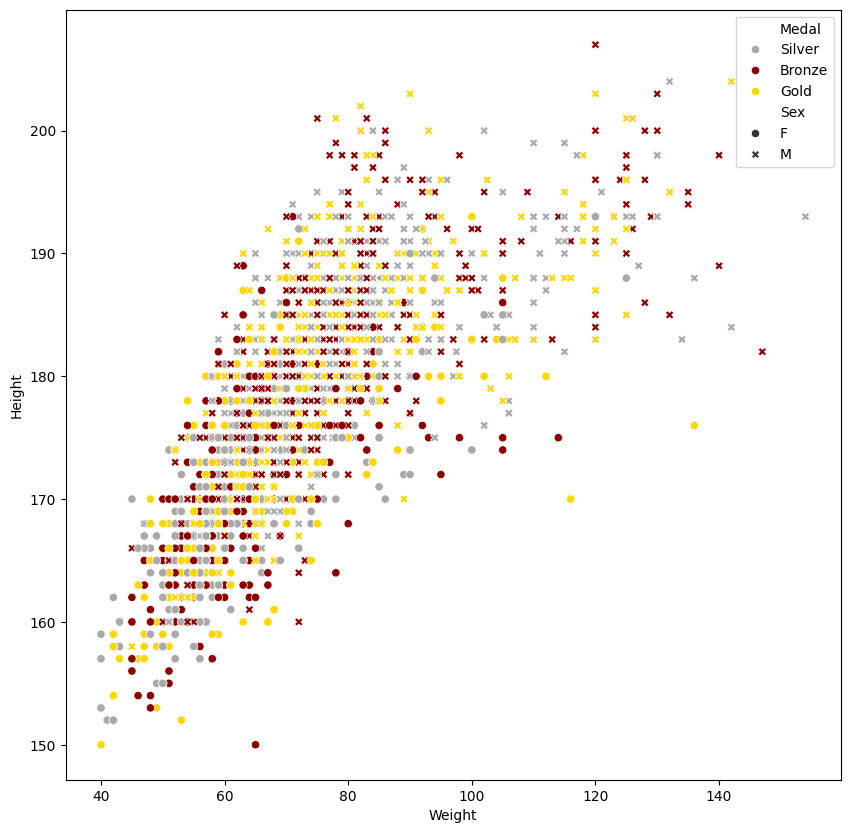

In [149]:
plt.figure(figsize=(10,10))
temp_df = athlete_df[(athlete_df['Sport']=='Athletics') & (athlete_df['Medal']!='No Medal')]

palette = {
    'Gold': '#FFD700',        # gold color
    'Silver': '#A9A9A9',      # dark grey
    'Bronze': '#8B0000',       # dark red (red-black)
    'No Medal': "#035A14"
}

sns.scatterplot(
    x=temp_df['Weight'],
    y=temp_df['Height'],
    hue=temp_df['Medal'],
    style=temp_df['Sex'],
    palette=palette
)

In [150]:
men=athlete_df[athlete_df['Sex']=='M'].groupby('Year').count()['Name'].reset_index()
women=athlete_df[athlete_df['Sex']=='F'].groupby('Year').count()['Name'].reset_index()

In [161]:
final = men.merge(women, on='Year', how='left')
final = final.rename(columns={'Name_x':'Male','Name_y':'Female'})
final = final.fillna(0)
fig = px.line(final, x='Year', y=['Male', 'Female'])
fig.show()